In [177]:
from sklearn.model_selection import train_test_split
from keras import layers,models
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import glob
import os
import numpy as np

In [166]:
def list_to_array(list1,list2):
    array1 = np.array(list1)
    array2 = np.array(list2)
    return array1, array2

In [167]:
# ラベル取得
def load_img(data_lists:list, img_size:tuple):
    X_train, y_train = [],[]
    for data_list in data_lists:
        img = Image.open(data_list)
        img = img.convert('RGB')
        img = img.resize((img_size))
        img = np.asarray(img)
        X = img / 255.0
        X_train.append(X)
        #　目的変数
        y = data_list[7:9]
        y = float(y)
        y_train.append(y)
    X_train, y_train = list_to_array(X_train, y_train)
    return X_train, y_train

In [168]:
def build_model(in_shpae):
    model = models.Sequential()
    model.add(layers.Conv2D(
        4, (3, 3), activation = 'relu',padding = 'same',input_shape = in_shpae))
    model.add(layers.MaxPool2D((2,2)))
    model.add(layers.Conv2D(16, (3, 3), activation= 'relu', padding= 'same'))
    model.add(layers.MaxPool2D((2,2)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
    model.add(layers.MaxPool2D((2,2)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Conv2D(128, (3,3), activation='relu', padding = 'same'))
    model.add(layers.MaxPool2D((2,2)))
    model.add(layers.Conv2D(256, (3,3), activation='relu', padding = 'same'))
    model.add(layers.MaxPool2D((2,2)))
    model.add(layers.Dropout(0.5))
#     model.add(layers.Conv2D(512, (3,3), activation='relu', padding = 'same'))
#     model.add(layers.MaxPool2D((2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss = 'mse', metrics = ['mae'])
    return model

In [169]:
all_mae = []
data_lists = glob.glob("./data/*")
img_size = (224,224)
X_train, y_train = load_img(data_lists, img_size)
in_shape = X_train[0].shape
model = build_model(in_shape)
model.fit(X_train, y_train,epochs = 10, batch_size = 1)

Epoch 1/10
100/100 [==============================] - 5s 54ms/step - loss: 257.5631 - mae: 12.5390
Epoch 2/10
100/100 [==============================] - 5s 48ms/step - loss: 160.3232 - mae: 9.9250
Epoch 3/10
100/100 [==============================] - 5s 50ms/step - loss: 151.8009 - mae: 8.7150
Epoch 4/10
100/100 [==============================] - 5s 51ms/step - loss: 182.3133 - mae: 10.3368
Epoch 5/10
100/100 [==============================] - 5s 47ms/step - loss: 190.2709 - mae: 10.5966
Epoch 6/10
100/100 [==============================] - 4s 45ms/step - loss: 158.7357 - mae: 9.5413
Epoch 7/10
100/100 [==============================] - 5s 51ms/step - loss: 169.2397 - mae: 10.4248
Epoch 8/10
100/100 [==============================] - 5s 55ms/step - loss: 155.8616 - mae: 9.6478
Epoch 9/10
100/100 [==============================] - 5s 48ms/step - loss: 172.9647 - mae: 9.7643
Epoch 10/10
100/100 [==============================] - 5s 48ms/step - loss: 148.9143 - mae: 8.9136


予想年齢:[[21.250456]]


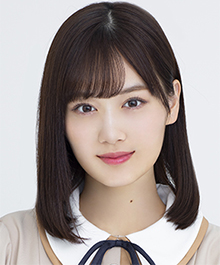

In [174]:
# 予測フェーズと元画像表示
test_data = './data/21_0017.jpg'
X_test = []
img = Image.open(test_data)
img = img.convert('RGB')
img = img.resize((224,224))
img = np.asarray(img)
X = img / 255.0
X = np.array(X)
X_test.append(X)
X_test = np.array(X_test)
y_pred = model.predict(X_test)
print('予想年齢:{}'.format(y_pred))
from IPython.display import Image as IM
from IPython.display import display_jpeg,display_png
if test_data[-3:] =='png':
    display_png(IM(test_data))
elif test_data[-3:] =='jpg':
    display_jpeg(IM(test_data))

In [179]:
np.argmax(y_pred)

0

In [180]:
y_pred

array([[21.250456]], dtype=float32)

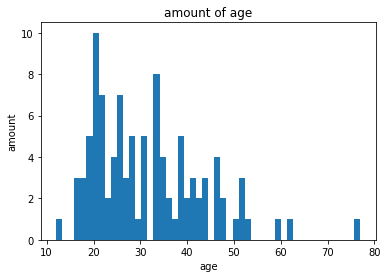

In [149]:
#年齢と数の割合
import matplotlib.pyplot as plt
plt.hist(y_train,bins=50)
plt.title('amount of age')
plt.xlabel('age')
plt.ylabel('amount')
plt.show()        

In [150]:
y_train.mean()

31.61

In [164]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 224, 224, 4)       112       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 112, 112, 4)       0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 112, 112, 16)      592       
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 56, 56, 16)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 54, 54, 64)        9280      
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 27, 27, 64)      